In [1]:
import sklearn.metrics as metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam ,SGD ,Adagrad
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.utils import to_categorical
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


C:\Users\zxzx2\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv("dataM.csv")

In [17]:
df.shape

(54495, 22)

In [9]:
# Split data into features and labels
X = df.drop("Current energy efficiency rating band", axis=1)
y = df["Current energy efficiency rating band"]
encoder = LabelEncoder()
y= encoder.fit_transform(y)

# One-hot encode labels
y = to_categorical(y, num_classes=7)

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
df["Current energy efficiency rating band"].value_counts()

C    24296
D    14264
B     8682
E     4703
F     1454
A      688
G      408
Name: Current energy efficiency rating band, dtype: int64

In [17]:
# Define which columns are categorical and which are numerical
categorical_cols = ["Part 1 Construction Age Band", "Mechanical Ventilation", "Tenure", "Transaction Type",
                   "wall_insulation", "roof_insulation", "wall_type", "roof_type", "floor_type",
                   "windows_glazing", "low_lighting"]
numerical_cols = ["Total floor area (m²)", "Total current energy costs over 3 years (£)",
                  "Current hot water costs over 3 years (£)", "Part 1 Floor 0 Room Height",
                  "Low Energy Lighting %", "insulated_wall", "MMH_mains gas", "MHCS_programmer",
                  "SH_room heaters"]

In [18]:
# Create ColumnTransformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

In [19]:
# Fit and transform the data using the ColumnTransformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(7, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=80)

Epoch 1/100


C:\Users\zxzx2\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


477/477 [==============================] - 3s 5ms/step - loss: 1.7351 - accuracy: 0.3601 - val_loss: 1.4741 - val_accuracy: 0.4469
Epoch 2/100
477/477 [==============================] - 3s 5ms/step - loss: 1.5066 - accuracy: 0.4546 - val_loss: 1.3238 - val_accuracy: 0.4934
Epoch 3/100
477/477 [==============================] - 5s 11ms/step - loss: 1.4048 - accuracy: 0.4844 - val_loss: 1.2339 - val_accuracy: 0.5450
Epoch 4/100
477/477 [==============================] - 6s 12ms/step - loss: 1.3452 - accuracy: 0.5031 - val_loss: 1.1717 - val_accuracy: 0.5754
Epoch 5/100
477/477 [==============================] - 5s 10ms/step - loss: 1.2960 - accuracy: 0.5207 - val_loss: 1.1238 - val_accuracy: 0.6003
Epoch 6/100
477/477 [==============================] - 5s 9ms/step - loss: 1.2550 - accuracy: 0.5344 - val_loss: 1.0846 - val_accuracy: 0.6145
Epoch 7/100
477/477 [==============================] - 6s 12ms/step - loss: 1.2261 - accuracy: 0.5426 - val_loss: 1.0520 - val_accuracy: 0.6226
Epoch 8

Epoch 58/100
477/477 [==============================] - 5s 10ms/step - loss: 0.8855 - accuracy: 0.6523 - val_loss: 0.7390 - val_accuracy: 0.7085
Epoch 59/100
477/477 [==============================] - 3s 6ms/step - loss: 0.8843 - accuracy: 0.6508 - val_loss: 0.7372 - val_accuracy: 0.7090
Epoch 60/100
477/477 [==============================] - 5s 10ms/step - loss: 0.8817 - accuracy: 0.6544 - val_loss: 0.7355 - val_accuracy: 0.7099
Epoch 61/100
477/477 [==============================] - 3s 6ms/step - loss: 0.8811 - accuracy: 0.6555 - val_loss: 0.7339 - val_accuracy: 0.7104
Epoch 62/100
477/477 [==============================] - 3s 6ms/step - loss: 0.8776 - accuracy: 0.6522 - val_loss: 0.7324 - val_accuracy: 0.7110
Epoch 63/100
477/477 [==============================] - 4s 8ms/step - loss: 0.8798 - accuracy: 0.6528 - val_loss: 0.7309 - val_accuracy: 0.7114
Epoch 64/100
477/477 [==============================] - 2s 4ms/step - loss: 0.8755 - accuracy: 0.6543 - val_loss: 0.7293 - val_accurac

In [22]:
# Evaluate model
score = model.evaluate(X_test, y_test)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

511/511 [==============================] - 3s 5ms/step - loss: 0.6888 - accuracy: 0.7266
Test loss:  0.6887883543968201
Test accuracy:  0.7266499400138855


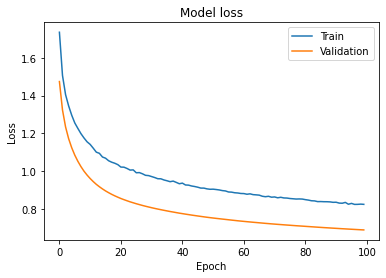

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

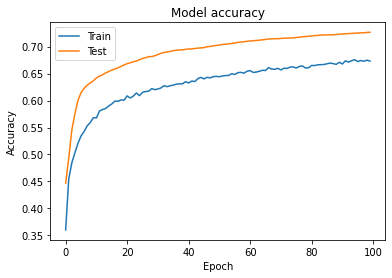

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


511/511 [==============================] - 1s 2ms/step
Average AUC: 0.894322096279913


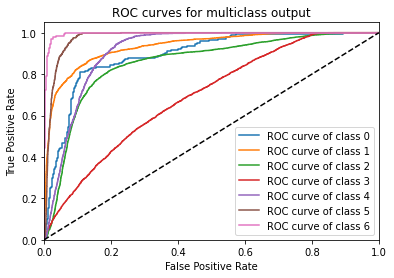

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class
y_pred_proba = model.predict(X_test)

# Compute the average AUC score across all classes
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('Average AUC:', auc)

# Compute the FPR and TPR for each class
fpr = dict()
tpr = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])

# Plot the ROC curve for each class
plt.figure()
for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {}'.format(i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiclass output')
plt.legend(loc="lower right")
plt.show()





In [26]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

#convert one hot encoded y_test to numerical format
y_test = y_test.argmax(axis=1)

# Evaluate model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

511/511 [==============================] - 1s 2ms/step
Accuracy:  0.7266499480090526
Precision:  0.6993963310508737
Recall:  0.7266499480090526
F1 Score:  0.7087865864470149


C:\Users\zxzx2\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
r2 = metrics.r2_score(y_test, y_pred)
print(f"\nr2: {rmse}") ##print mean square error and r2
print(f"\nRMSE: {rmse}")


r2: 0.5700649125549394

RMSE: 0.5700649125549394


In [38]:
def plot_conf_mat(y_test, y_pred):
    '''prints the confusion matrix'''
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.8)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='small')

    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix', fontsize=10)
    plt.show()
    return

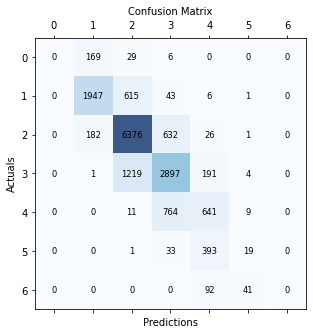

In [39]:
plot_conf_mat(y_test, y_pred)